In [ ]:
# Modules for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier



# Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix



# Parameter Tuning

from sklearn.model_selection import GridSearchCV

## EDA

In [ ]:
file1 = pd.read_csv('/content/Insurance_Claims (2).csv')

In [ ]:
file1.head(10)

,months_as_customer,age,insured_sex,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,...,incident_city,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,MALE,OH,1000,1406.91,0,MD,craft-repair,sleeping,...,Columbus,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,MALE,IN,2000,1197.22,5000000,MD,machine-op-inspct,reading,...,Riverwood,?,0,0,?,5070,780,780,3510,Y
2,134,29,FEMALE,OH,2000,1413.14,5000000,PhD,sales,board-games,...,Columbus,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,FEMALE,IL,2000,1415.74,6000000,PhD,armed-forces,board-games,...,Arlington,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,MALE,IL,1000,1583.91,6000000,Associate,sales,board-games,...,Arlington,NO,0,1,NO,6500,1300,650,4550,N
5,256,39,FEMALE,OH,1000,1351.10,0,PhD,tech-support,bungie-jumping,...,Arlington,NO,0,2,NO,64100,6410,6410,51280,Y
6,137,34,MALE,IN,1000,1333.35,0,PhD,prof-specialty,board-games,...,Springfield,?,0,0,?,78650,21450,7150,50050,N
7,165,37,MALE,IL,1000,1137.03,0,Associate,tech-support,base-jumping,...,Columbus,?,2,2,YES,51590,9380,9380,32830,N
8,27,33,FEMALE,IL,500,1442.99,0,PhD,other-service,golf,...,Arlington,NO,1,1,YES,27700,2770,2770,22160,N
9,212,42,MALE,IL,500,1315.68,0,PhD,priv-house-serv,camping,...,Hillsdale,NO,2,1,?,42300,4700,4700,32900,N


In [ ]:
file1.tail(10)

,months_as_customer,age,insured_sex,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,...,incident_city,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
990,286,43,FEMALE,IL,500,1564.43,3000000,MD,prof-specialty,movies,...,Northbrook,?,2,2,YES,34290,3810,3810,26670,N
991,257,44,MALE,OH,1000,1280.88,0,MD,other-service,basketball,...,Riverwood,NO,0,1,NO,46980,0,5220,41760,N
992,94,26,MALE,IN,500,722.66,0,MD,exec-managerial,camping,...,Springfield,YES,1,2,YES,36700,3670,7340,25690,N
993,124,28,MALE,OH,1000,1235.14,0,MD,exec-managerial,camping,...,Hillsdale,?,0,1,?,60200,6020,6020,48160,N
994,141,30,MALE,IN,1000,1347.04,0,High School,sales,bungie-jumping,...,Northbend,?,1,2,YES,6480,540,1080,4860,N
995,3,38,FEMALE,OH,1000,1310.80,0,Masters,craft-repair,paintball,...,Northbrook,YES,0,1,?,87200,17440,8720,61040,N
996,285,41,FEMALE,IL,1000,1436.79,0,PhD,prof-specialty,sleeping,...,Northbend,YES,2,3,?,108480,18080,18080,72320,N
997,130,34,FEMALE,OH,500,1383.49,3000000,Masters,armed-forces,bungie-jumping,...,Arlington,?,2,3,YES,67500,7500,7500,52500,N
998,458,62,MALE,IL,2000,1356.92,5000000,Associate,handlers-cleaners,base-jumping,...,Arlington,?,0,1,YES,46980,5220,5220,36540,N
999,456,60,FEMALE,OH,1000,766.19,0,Associate,sales,kayaking,...,Columbus,?,0,3,?,5060,460,920,3680,N


In [ ]:
file1.sample(10)

,months_as_customer,age,insured_sex,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,...,incident_city,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
197,223,43,FEMALE,OH,500,1734.09,0,MD,adm-clerical,camping,...,Arlington,YES,0,3,?,5200,650,650,3900,N
106,464,61,FEMALE,OH,1000,1125.37,0,Associate,prof-specialty,basketball,...,Northbend,?,0,2,YES,79800,6650,19950,53200,Y
511,283,48,FEMALE,OH,1000,1474.66,0,JD,sales,paintball,...,Hillsdale,?,2,3,NO,6560,820,820,4920,N
362,150,30,MALE,IN,1000,1342.02,0,MD,prof-specialty,polo,...,Arlington,YES,0,2,NO,4500,450,450,3600,N
217,38,28,MALE,OH,1000,1019.44,0,Masters,transport-moving,yachting,...,Springfield,?,2,1,NO,7200,1440,720,5040,N
872,290,45,FEMALE,OH,1000,1311.30,0,Associate,machine-op-inspct,chess,...,Hillsdale,YES,0,0,YES,52650,5850,5850,40950,Y
739,194,34,MALE,IN,1000,1423.34,0,Associate,sales,camping,...,Riverwood,YES,0,3,NO,9100,1400,1400,6300,N
576,282,46,MALE,OH,2000,1558.86,0,MD,other-service,dancing,...,Springfield,?,2,2,NO,69400,13880,6940,48580,N
93,219,43,FEMALE,IN,1000,1483.25,0,MD,exec-managerial,exercise,...,Riverwood,NO,1,1,?,70680,5890,11780,53010,N
277,264,41,MALE,OH,500,1411.30,0,PhD,prof-specialty,cross-fit,...,Northbrook,NO,1,0,?,60390,10980,5490,43920,Y


In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   insured_sex              1000 non-null   object 
 3   policy_state             1000 non-null   object 
 4   policy_deductable        1000 non-null   int64  
 5   policy_annual_premium    1000 non-null   float64
 6   umbrella_limit           1000 non-null   int64  
 7   insured_education_level  1000 non-null   object 
 8   insured_occupation       1000 non-null   object 
 9   insured_hobbies          1000 non-null   object 
 10  capital-gains            1000 non-null   int64  
 11  capital-loss             1000 non-null   int64  
 12  incident_date            1000 non-null   object 
 13  incident_state           1000 non-null   object 
 14  incident_city            

In [ ]:
file1.duplicated().sum()

0

In [ ]:
file1.isna().sum()

months_as_customer         0
age                        0
insured_sex                0
policy_state               0
policy_deductable          0
policy_annual_premium      0
umbrella_limit             0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
capital-gains              0
capital-loss               0
incident_date              0
incident_state             0
incident_city              0
property_damage            0
bodily_injuries            0
witnesses                  0
police_report_available    0
total_claim_amount         0
injury_claim               0
property_claim             0
vehicle_claim              0
fraud_reported             0
dtype: int64

In [ ]:
file1.dropna(inplace=True)

In [ ]:
file1.isna().sum()

months_as_customer         0
age                        0
insured_sex                0
policy_state               0
policy_deductable          0
policy_annual_premium      0
umbrella_limit             0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
capital-gains              0
capital-loss               0
incident_date              0
incident_state             0
incident_city              0
property_damage            0
bodily_injuries            0
witnesses                  0
police_report_available    0
total_claim_amount         0
injury_claim               0
property_claim             0
vehicle_claim              0
fraud_reported             0
dtype: int64

There are few '?' values in the columns

In [ ]:
file1['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

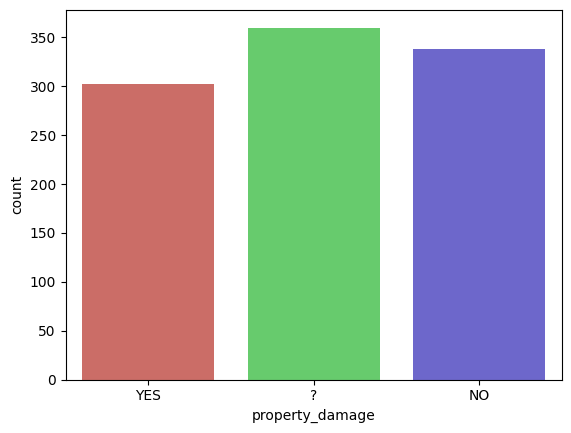

In [ ]:
sns.countplot(x= 'property_damage', data = file1, hue = 'property_damage', palette='hls')
plt.show()

In [ ]:
file1.groupby('property_damage')['fraud_reported'].value_counts()

property_damage  fraud_reported
?                N                 257
                 Y                 103
NO               N                 272
                 Y                  66
YES              N                 224
                 Y                  78
Name: count, dtype: int64

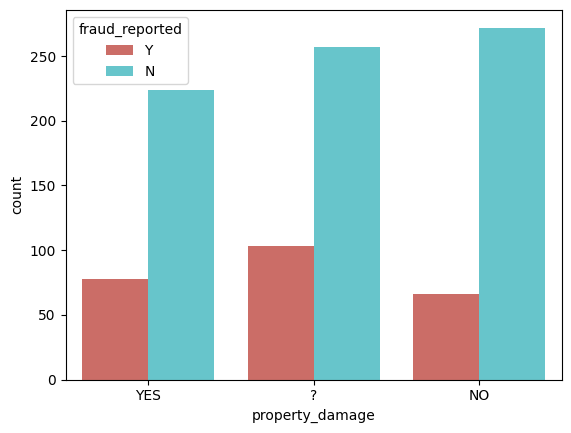

In [ ]:
sns.countplot(x= 'property_damage', data = file1, hue = 'fraud_reported', palette='hls')
plt.show()

In [ ]:
temp = file1[file1['property_damage'] != '?']['property_damage'].mode()[0]

In [ ]:
file1['property_damage'] = file1['property_damage'].str.replace('?', temp)

In [ ]:
file1['property_damage'].value_counts()

property_damage
NO     698
YES    302
Name: count, dtype: int64

In [ ]:
file1['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

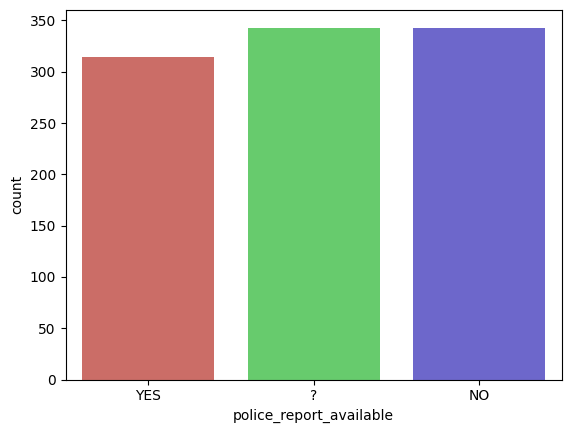

In [ ]:
sns.countplot(x= 'police_report_available', data = file1, hue = 'police_report_available', palette='hls')
plt.show()

In [ ]:
file1.groupby('police_report_available')['fraud_reported'].value_counts()

police_report_available  fraud_reported
?                        N                 254
                         Y                  89
NO                       N                 257
                         Y                  86
YES                      N                 242
                         Y                  72
Name: count, dtype: int64

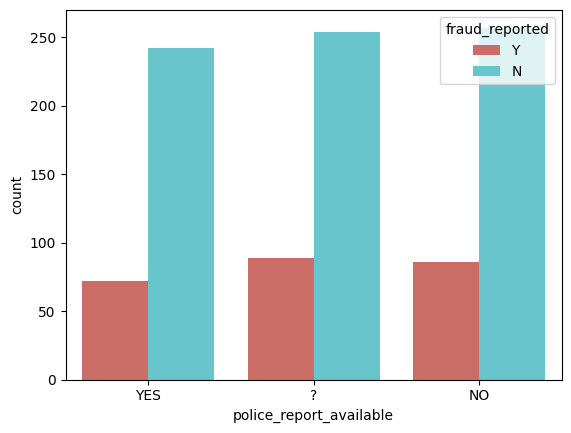

In [ ]:
sns.countplot(x= 'police_report_available', data = file1, hue = 'fraud_reported', palette='hls')
plt.show()

In [ ]:
file1['police_report_available'] = file1['police_report_available'].str.replace('?', file1[file1['police_report_available'] != '?']['police_report_available'].mode()[0])

In [ ]:
file1['police_report_available'].value_counts()

police_report_available
NO     686
YES    314
Name: count, dtype: int64

In [ ]:
file1.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [ ]:
corr = file1.corr(numeric_only=True)

In [ ]:
corr

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449
witnesses,0.058383,0.052359,0.066639,0.002332,-0.006738,-0.017651,-0.041330,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564
total_claim_amount,0.062108,0.069863,0.022839,0.009094,-0.040344,0.015980,-0.036060,0.047093,-0.011114,1.000000,0.805025,0.810686,0.982773


<Axes: >

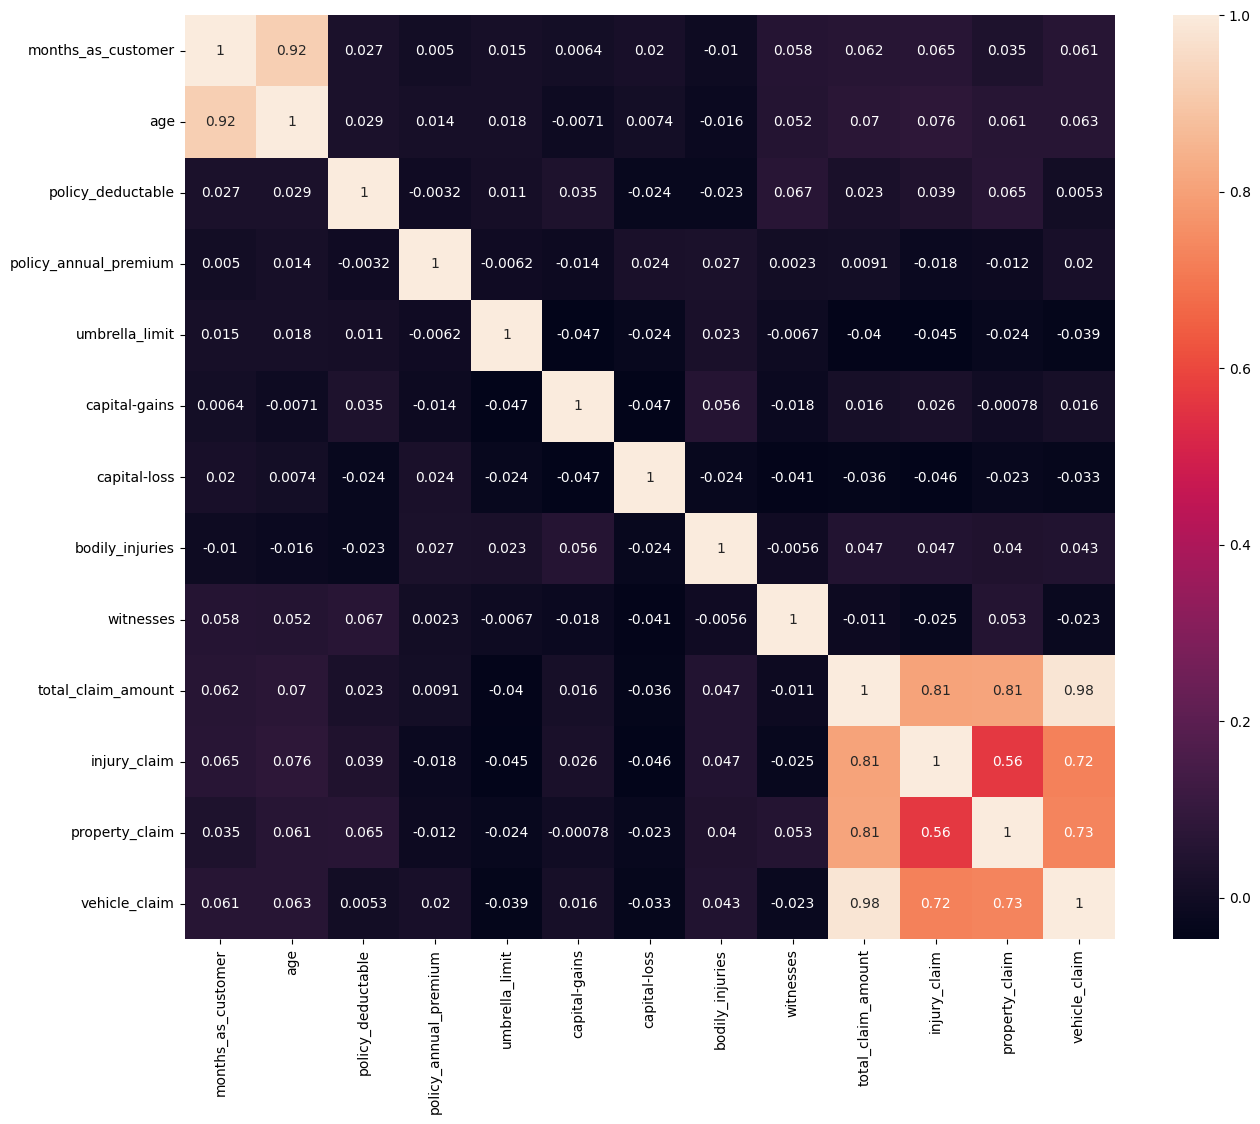

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr, annot = True)

In [ ]:
file1.drop(['total_claim_amount', 'age'], axis =1, inplace = True)

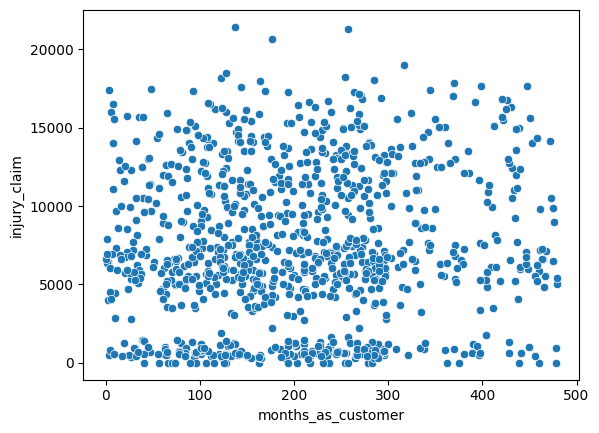

In [ ]:
sns.scatterplot(x = 'months_as_customer', data = file1, y = 'injury_claim')
plt.show()

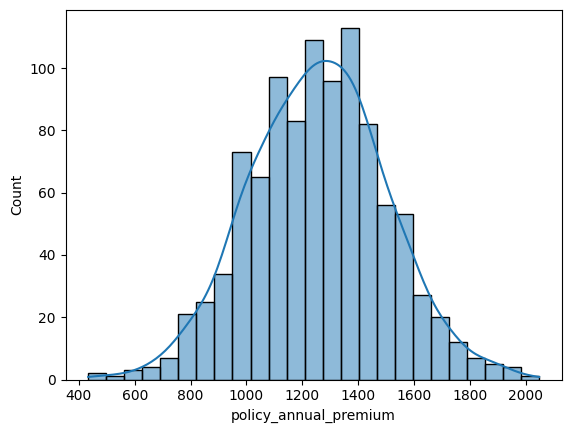

In [ ]:
sns.histplot(x = 'policy_annual_premium', data = file1, kde = True)
plt.show()

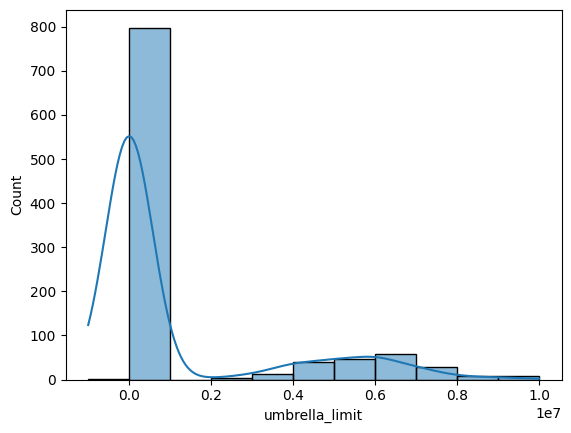

In [ ]:
sns.histplot(x = 'umbrella_limit', data = file1, kde = True)
plt.show()

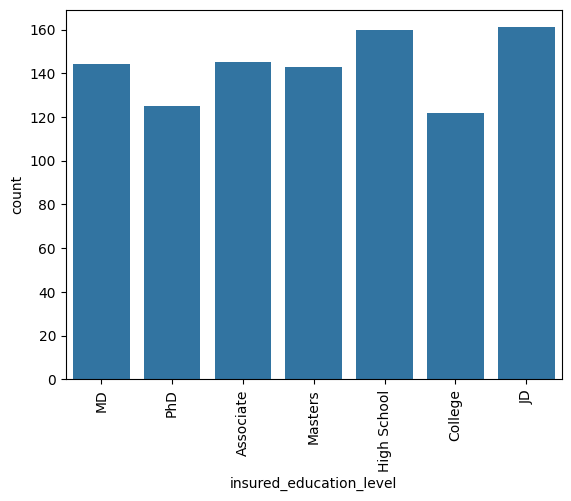

In [ ]:
sns.countplot(x = 'insured_education_level', data = file1)
plt.xticks(rotation = 90)
plt.show()

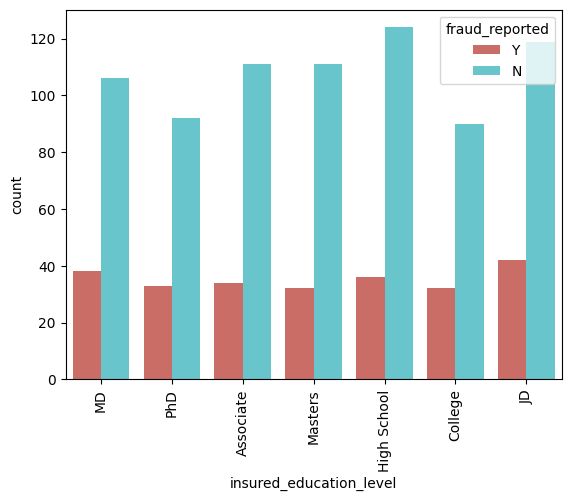

In [ ]:
sns.countplot(x = 'insured_education_level', data = file1, hue = 'fraud_reported', palette='hls')
plt.xticks(rotation = 90)
plt.show()

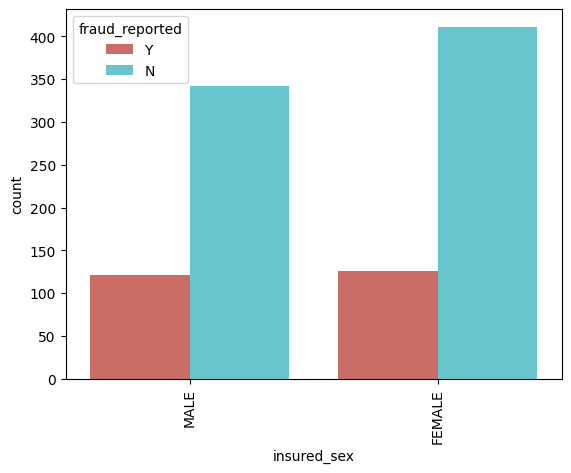

In [ ]:
sns.countplot(x = 'insured_sex', data = file1, hue = 'fraud_reported', palette='hls')
plt.xticks(rotation = 90)
plt.show()

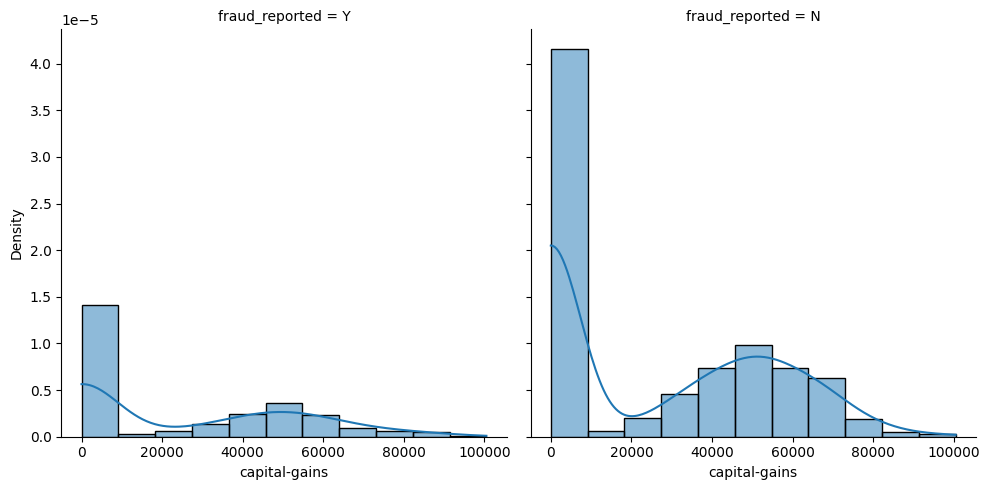

In [ ]:
sns.displot(x = 'capital-gains', data = file1, kde = True, col = 'fraud_reported', stat = 'density')
plt.show()

In [ ]:
numeric_cols = file1.select_dtypes(include=['number'])

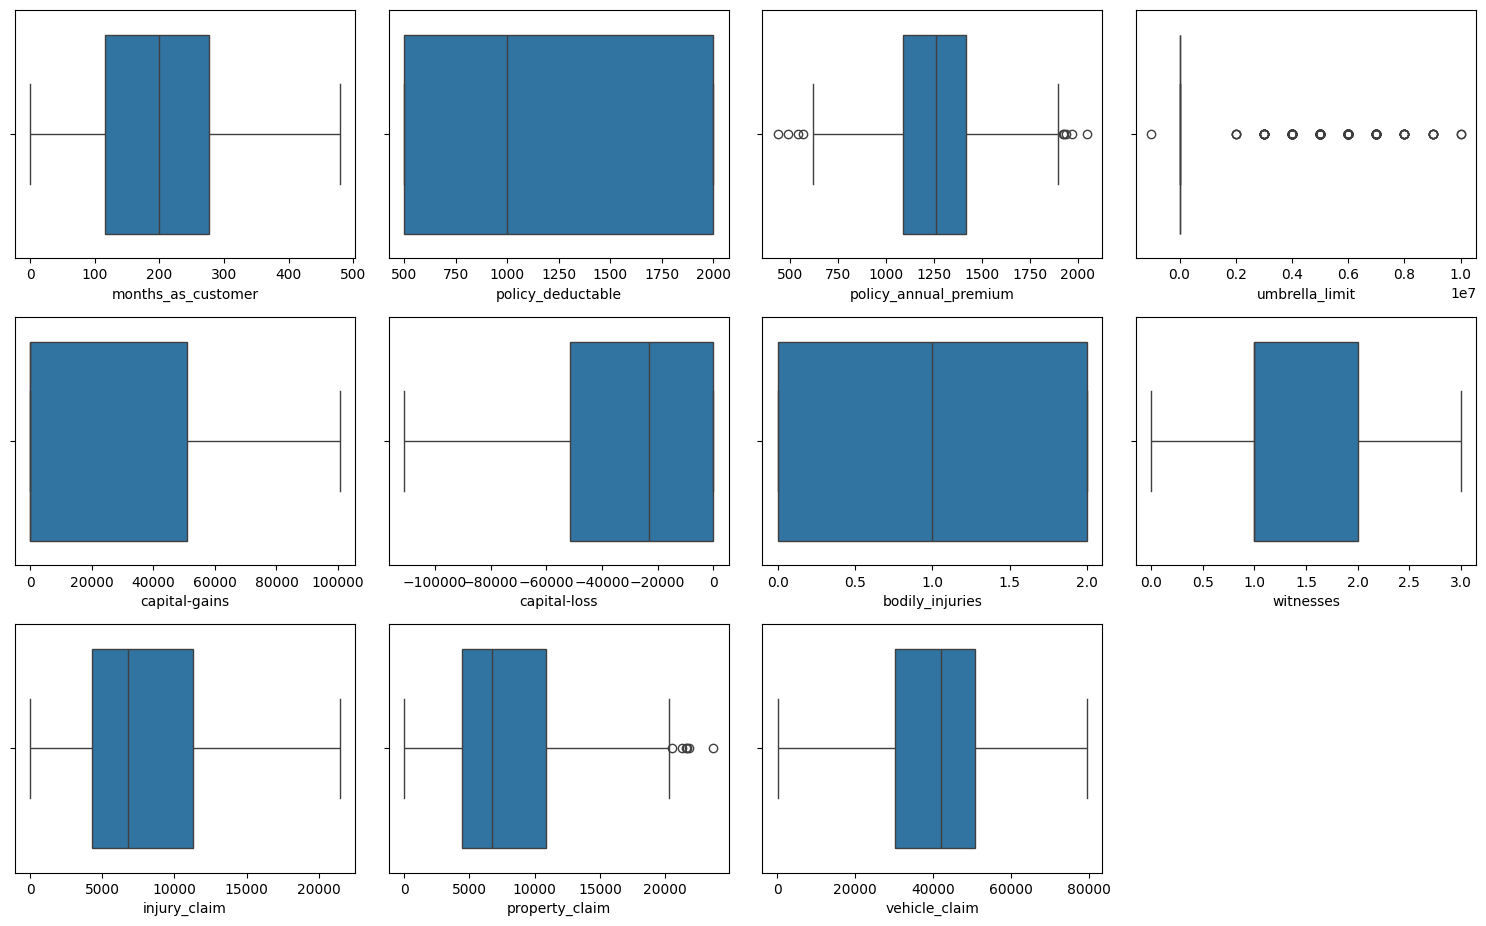

In [ ]:
figure = plt.figure(figsize=(15, 12))

for i, j in enumerate(numeric_cols.columns):
    ax = plt.subplot(4,4,i+1)
    sns.boxplot(x = j, data = file1)
plt.tight_layout()
plt.show()

In [ ]:
file1

,months_as_customer,insured_sex,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,incident_state,incident_city,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,MALE,OH,1000,1406.91,0,MD,craft-repair,sleeping,53300,...,SC,Columbus,YES,1,2,YES,6510,13020,52080,Y
1,228,MALE,IN,2000,1197.22,5000000,MD,machine-op-inspct,reading,0,...,VA,Riverwood,NO,0,0,NO,780,780,3510,Y
2,134,FEMALE,OH,2000,1413.14,5000000,PhD,sales,board-games,35100,...,NY,Columbus,NO,2,3,NO,7700,3850,23100,N
3,256,FEMALE,IL,2000,1415.74,6000000,PhD,armed-forces,board-games,48900,...,OH,Arlington,NO,1,2,NO,6340,6340,50720,Y
4,228,MALE,IL,1000,1583.91,6000000,Associate,sales,board-games,66000,...,NY,Arlington,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,FEMALE,OH,1000,1310.80,0,Masters,craft-repair,paintball,0,...,NC,Northbrook,YES,0,1,NO,17440,8720,61040,N
996,285,FEMALE,IL,1000,1436.79,0,PhD,prof-specialty,sleeping,70900,...,SC,Northbend,YES,2,3,NO,18080,18080,72320,N
997,130,FEMALE,OH,500,1383.49,3000000,Masters,armed-forces,bungie-jumping,35100,...,NC,Arlington,NO,2,3,YES,7500,7500,52500,N
998,458,MALE,IL,2000,1356.92,5000000,Associate,handlers-cleaners,base-jumping,0,...,NY,Arlington,NO,0,1,YES,5220,5220,36540,N


In [ ]:
# Let's get the categorical_data.

categorical_data = file1.select_dtypes(include = ['object'])

In [ ]:
categorical_data

,insured_sex,policy_state,insured_education_level,insured_occupation,insured_hobbies,incident_date,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,MALE,OH,MD,craft-repair,sleeping,2015-01-25,SC,Columbus,YES,YES,Y
1,MALE,IN,MD,machine-op-inspct,reading,2015-01-21,VA,Riverwood,NO,NO,Y
2,FEMALE,OH,PhD,sales,board-games,2015-02-22,NY,Columbus,NO,NO,N
3,FEMALE,IL,PhD,armed-forces,board-games,2015-01-10,OH,Arlington,NO,NO,Y
4,MALE,IL,Associate,sales,board-games,2015-02-17,NY,Arlington,NO,NO,N
...,...,...,...,...,...,...,...,...,...,...,...
995,FEMALE,OH,Masters,craft-repair,paintball,2015-02-22,NC,Northbrook,YES,NO,N
996,FEMALE,IL,PhD,prof-specialty,sleeping,2015-01-24,SC,Northbend,YES,NO,N
997,FEMALE,OH,Masters,armed-forces,bungie-jumping,2015-01-23,NC,Arlington,NO,YES,N
998,MALE,IL,Associate,handlers-cleaners,base-jumping,2015-02-26,NY,Arlington,NO,YES,N


In [ ]:
file1.drop(categorical_data.columns, axis = 1, inplace = True)

In [ ]:
le = LabelEncoder()


for i in categorical_data.columns:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [ ]:
categorical_data

,insured_sex,policy_state,insured_education_level,insured_occupation,insured_hobbies,incident_date,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,1,2,4,2,17,24,4,1,1,1,1
1,1,1,4,6,15,20,5,5,0,0,1
2,0,2,6,11,2,52,1,1,0,0,0
3,0,0,6,1,2,9,2,0,0,0,1
4,1,0,0,11,2,47,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,2,5,2,13,52,0,4,1,0,0
996,0,0,6,9,17,23,4,3,1,0,0
997,0,2,5,1,3,22,0,0,0,1,0
998,1,0,0,5,0,56,1,0,0,1,0


Scaling the Numerical Data

In [ ]:
scaler = StandardScaler()

In [ ]:
file1

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,0,1,17440,8720,61040
996,285,1000,1436.79,0,70900,0,2,3,18080,18080,72320
997,130,500,1383.49,3000000,35100,0,2,3,7500,7500,52500
998,458,2000,1356.92,5000000,0,0,0,1,5220,5220,36540


In [ ]:
file3 = pd.concat([file1, categorical_data], axis = 1)

In [ ]:
file3

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,injury_claim,property_claim,...,policy_state,insured_education_level,insured_occupation,insured_hobbies,incident_date,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,328,1000,1406.91,0,53300,0,1,2,6510,13020,...,2,4,2,17,24,4,1,1,1,1
1,228,2000,1197.22,5000000,0,0,0,0,780,780,...,1,4,6,15,20,5,5,0,0,1
2,134,2000,1413.14,5000000,35100,0,2,3,7700,3850,...,2,6,11,2,52,1,1,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,1,2,6340,6340,...,0,6,1,2,9,2,0,0,0,1
4,228,1000,1583.91,6000000,66000,-46000,0,1,1300,650,...,0,0,11,2,47,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,0,1,17440,8720,...,2,5,2,13,52,0,4,1,0,0
996,285,1000,1436.79,0,70900,0,2,3,18080,18080,...,0,6,9,17,23,4,3,1,0,0
997,130,500,1383.49,3000000,35100,0,2,3,7500,7500,...,2,5,1,3,22,0,0,0,1,0
998,458,2000,1356.92,5000000,0,0,0,1,5220,5220,...,0,0,5,0,56,1,0,0,1,0


In [ ]:
X = file3.drop('fraud_reported', axis= 1)
y = file3['fraud_reported']

In [ ]:
X_Scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size = 0.3, random_state = 5)

## **Models**

In [ ]:
logistic_regression = LogisticRegression()
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=300)
k_neighbors = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()
extra_tree = ExtraTreeClassifier()

## Logistic Regression

In [ ]:
logistic_regression.fit(X_train, y_train)


# Train Data
y_train_pred = logistic_regression.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = logistic_regression.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 0.7614285714285715
Precision: 0.5714285714285714
Recall: 0.047337278106508875
F1-score: 0.08743169398907104
Confusion Matrix for Training Set:
[[525   6]
 [161   8]]


Metrics for Test Set:
Accuracy: 0.7366666666666667
Precision: 0.4
Recall: 0.02564102564102564
F1-score: 0.048192771084337345
Confusion Matrix for Test Set:
[[219   3]
 [ 76   2]]


## Support Vector Machine

In [ ]:
svc.fit(X_train, y_train)

# Train Data
y_train_pred = svc.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = svc.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 0.7885714285714286
Precision: 1.0
Recall: 0.1242603550295858
F1-score: 0.22105263157894736
Confusion Matrix for Training Set:
[[531   0]
 [148  21]]


Metrics for Test Set:
Accuracy: 0.74
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix for Test Set:
[[222   0]
 [ 78   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [ ]:
decision_tree.fit(X_train, y_train)


# Train Data
y_train_pred = decision_tree.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = decision_tree.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix for Training Set:
[[531   0]
 [  0 169]]


Metrics for Test Set:
Accuracy: 0.65
Precision: 0.30985915492957744
Recall: 0.28205128205128205
F1-score: 0.2953020134228188
Confusion Matrix for Test Set:
[[173  49]
 [ 56  22]]


### Hyper Parameter Tuning

In [ ]:
param_grids_dt = {
	'criterion': ['gini', 'entropy'],
	'max_depth': [None, 5, 10, 20],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4],
	}

In [ ]:
cv = GridSearchCV(estimator=decision_tree, param_grid=param_grids_dt, cv=5)
cv.fit(X_train, y_train)

model = cv.best_estimator_
print("Best Parameters: ", cv.best_params_)

best_train_predict = model.predict(X_train)
best_test_predict = model.predict(X_test)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
# Compute evaluation metrics for training set
accuracy_train_svc = accuracy_score(y_train, best_train_predict)
precision_train_svc = precision_score(y_train, best_train_predict)
recall_train_svc = recall_score(y_train, best_train_predict)
f1_train_svc = f1_score(y_train, best_train_predict)
conf_matrix_train_svc = confusion_matrix(y_train, best_train_predict)

# Compute evaluation metrics for test set
accuracy_test_svc = accuracy_score(y_test, best_test_predict)
precision_test_svc = precision_score(y_test, best_test_predict)
recall_test_svc = recall_score(y_test, best_test_predict)
f1_test_svc = f1_score(y_test, best_test_predict)
conf_matrix_test_svc = confusion_matrix(y_test, best_test_predict)

# Print evaluation metrics for training set
print("Training set (Decision Tree):")
print("Accuracy:", accuracy_train_svc)
print("Precision:", precision_train_svc)
print("Recall:", recall_train_svc)
print("F1-score:", f1_train_svc)
print("Confusion Matrix:")
print(conf_matrix_train_svc)
print()

# Print evaluation metrics for test set
print("Test set (Decision Tree):")
print("Accuracy:", accuracy_test_svc)
print("Precision:", precision_test_svc)
print("Recall:", recall_test_svc)
print("F1-score:", f1_test_svc)
print("Confusion Matrix:")
print(conf_matrix_test_svc)


Training set (Decision Tree):
Accuracy: 0.8285714285714286
Precision: 0.8356164383561644
Recall: 0.3609467455621302
F1-score: 0.5041322314049587
Confusion Matrix:
[[519  12]
 [108  61]]

Test set (Decision Tree):
Accuracy: 0.6966666666666667
Precision: 0.25925925925925924
Recall: 0.08974358974358974
F1-score: 0.13333333333333333
Confusion Matrix:
[[202  20]
 [ 71   7]]


## Random Forest

In [ ]:
random_forest.fit(X_train, y_train)


# Train Data
y_train_pred = random_forest.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = random_forest.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix for Training Set:
[[531   0]
 [  0 169]]


Metrics for Test Set:
Accuracy: 0.7366666666666667
Precision: 0.4
Recall: 0.02564102564102564
F1-score: 0.048192771084337345
Confusion Matrix for Test Set:
[[219   3]
 [ 76   2]]


### Hyper Parameter Tuning

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': ['True', 'False'],
    'criterion': ['gini', 'entropy']
}



cv = GridSearchCV(estimator=random_forest, param_grid=param_grids_dt, cv=5)
cv.fit(X_train, y_train)

model = cv.best_estimator_
print("Best Parameters: ", cv.best_params_)

best_train_predict = model.predict(X_train)
best_test_predict = model.predict(X_test)



# Compute evaluation metrics for training set
accuracy_train_svc = accuracy_score(y_train, best_train_predict)
precision_train_svc = precision_score(y_train, best_train_predict)
recall_train_svc = recall_score(y_train, best_train_predict)
f1_train_svc = f1_score(y_train, best_train_predict)
conf_matrix_train_svc = confusion_matrix(y_train, best_train_predict)

# Compute evaluation metrics for test set
accuracy_test_svc = accuracy_score(y_test, best_test_predict)
precision_test_svc = precision_score(y_test, best_test_predict)
recall_test_svc = recall_score(y_test, best_test_predict)
f1_test_svc = f1_score(y_test, best_test_predict)
conf_matrix_test_svc = confusion_matrix(y_test, best_test_predict)

# Print evaluation metrics for training set
print("Training set (Random Forest):")
print("Accuracy:", accuracy_train_svc)
print("Precision:", precision_train_svc)
print("Recall:", recall_train_svc)
print("F1-score:", f1_train_svc)
print("Confusion Matrix:")
print(conf_matrix_train_svc)
print()

# Print evaluation metrics for test set
print("Test set (Random Forest):")
print("Accuracy:", accuracy_test_svc)
print("Precision:", precision_test_svc)
print("Recall:", recall_test_svc)
print("F1-score:", f1_test_svc)
print("Confusion Matrix:")
print(conf_matrix_test_svc)


Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training set (Random Forest):
Accuracy: 0.9971428571428571
Precision: 1.0
Recall: 0.9881656804733728
F1-score: 0.9940476190476192
Confusion Matrix:
[[531   0]
 [  2 167]]

Test set (Random Forest):
Accuracy: 0.7433333333333333
Precision: 0.6666666666666666
Recall: 0.02564102564102564
F1-score: 0.04938271604938271
Confusion Matrix:
[[221   1]
 [ 76   2]]


## KNN

In [ ]:
k_neighbors.fit(X_train, y_train)

# Training Set Metrics
y_train_pred = k_neighbors.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Test Set Metrics
y_test_pred = k_neighbors.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)
print("\n")


Metrics for Training Set:
Accuracy: 0.78
Precision: 0.6271186440677966
Recall: 0.21893491124260356
F1-score: 0.32456140350877194
Confusion Matrix for Training Set:
[[509  22]
 [132  37]]


Metrics for Test Set:
Accuracy: 0.69
Precision: 0.10526315789473684
Recall: 0.02564102564102564
F1-score: 0.041237113402061855
Confusion Matrix for Test Set:
[[205  17]
 [ 76   2]]




### Hyper Parameter Tuning

In [ ]:
k_neighbors_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # added 'brute' for cosine metric
    'leaf_size': [10, 20, 30],
    'p': [1, 2, 3, 4],
    'metric': ['minkowski', 'euclidean', 'manhattan']  # removed 'cosine'
}



cv_knn = GridSearchCV(estimator=k_neighbors, param_grid=k_neighbors_param_grid, cv=5, n_jobs =-1)
cv_knn.fit(X_train, y_train)

best_knn_model = cv_knn.best_estimator_
print("Best Parameters (K Neighbors Classifier):", cv_knn.best_params_)

best_train_predict_knn = best_knn_model.predict(X_train)
best_test_predict_knn = best_knn_model.predict(X_test)

accuracy_train_knn = accuracy_score(y_train, best_train_predict_knn)
precision_train_knn = precision_score(y_train, best_train_predict_knn)
recall_train_knn = recall_score(y_train, best_train_predict_knn)
f1_train_knn = f1_score(y_train, best_train_predict_knn)
conf_matrix_train_knn = confusion_matrix(y_train, best_train_predict_knn)

accuracy_test_knn = accuracy_score(y_test, best_test_predict_knn)
precision_test_knn = precision_score(y_test, best_test_predict_knn)
recall_test_knn = recall_score(y_test, best_test_predict_knn)
f1_test_knn = f1_score(y_test, best_test_predict_knn)
conf_matrix_test_knn = confusion_matrix(y_test, best_test_predict_knn)

print("Training set (K Neighbors Classifier):")
print("Accuracy:", accuracy_train_knn)
print("Precision:", precision_train_knn)
print("Recall:", recall_train_knn)
print("F1-score:", f1_train_knn)
print("Confusion Matrix:")
print(conf_matrix_train_knn)
print()

print("Test set (K Neighbors Classifier):")
print("Accuracy:", accuracy_test_knn)
print("Precision:", precision_test_knn)
print("Recall:", recall_test_knn)
print("F1-score:", f1_test_knn)
print("Confusion Matrix:")
print(conf_matrix_test_knn)


Best Parameters (K Neighbors Classifier): {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Training set (K Neighbors Classifier):
Accuracy: 0.7771428571428571
Precision: 0.8823529411764706
Recall: 0.08875739644970414
F1-score: 0.16129032258064516
Confusion Matrix:
[[529   2]
 [154  15]]

Test set (K Neighbors Classifier):
Accuracy: 0.7266666666666667
Precision: 0.16666666666666666
Recall: 0.01282051282051282
F1-score: 0.023809523809523808
Confusion Matrix:
[[217   5]
 [ 77   1]]
